# **spotifydataproject**
### A spotify data analysis project from a kaggle dataset using:




>* **python**

>* **pandas**

>* **matplotlib**

## **1- Importing libraries and dataset:**
* Pandas
* Numpy
* Datetime
* Matplotlib
> * Spotify Dataset (https://www.kaggle.com/datasets/naoh1092/spotify-genre-audio-features)

In [632]:
#Se importan las librerías necesarias
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [633]:
#Se carga el archivo excel y se asigna a una variable
spot = pd.read_excel('Spotify Genre Audio features - Kaggle.xlsx')

In [634]:
#Se chequean las primeras filas del dataframe
spot.head()

,Genre,Title,Album_cover_link,Artist,duration_ms,explicit,id,popularity,release_date,release_date_precision,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,rock,Baba O'Riley,https://i.scdn.co/image/ab67616d0000b273fe24dc...,The Who,300400,False,3qiyyUfYe7CRYLucrPmulD,75,1971-08-14,day,...,5,-8.367,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292,4
1,rock,More Than a Feeling,https://i.scdn.co/image/ab67616d0000b27390ef97...,Boston,285133,False,1QEEqeFIZktqIpPI4jSVSF,78,1976,year,...,7,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,4
2,rock,(Don't Fear) The Reaper,https://i.scdn.co/image/ab67616d0000b2733ac318...,Blue Öyster Cult,308120,False,5QTxFnGygVM4jFQiBovmRo,76,1976,year,...,9,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466,4
3,rock,Jump - 2015 Remaster,https://i.scdn.co/image/ab67616d0000b273b414c6...,Van Halen,241599,False,7N3PAbqfTjSEU1edb2tY8j,78,1984-01-04,day,...,0,-6.219,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981,4
4,rock,Stairway to Heaven - Remaster,https://i.scdn.co/image/ab67616d0000b273c8a11e...,Led Zeppelin,482830,False,5CQ30WqJwcep0pYcV4AMNc,79,1971-11-08,day,...,9,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,4


## **2- Data Cleansing and Dataframe Formating:**
* Changing and correcting data types
* Creating new columns
* Dropping unnecessary columns
* Deleting duplicated values
* Exporting cleaned dataframe into excel file

In [635]:
#Se chequean los tipos de datos del dataframe
spot.dtypes

Genre                      object
Title                      object
Album_cover_link           object
Artist                     object
duration_ms                 int64
explicit                     bool
id                         object
popularity                  int64
release_date               object
release_date_precision     object
total_tracks                int64
danceability              float64
energy                    float64
key                         int64
loudness                  float64
mode                        int64
speechiness               float64
acousticness              float64
instrumentalness          float64
liveness                  float64
valence                   float64
tempo                     float64
time_signature              int64
dtype: object

In [636]:
#Se modifican los tipos de datos de algunas columnas (a string)
spot[['Genre', 'Title', 'Artist']] = spot[['Genre', 'Title', 'Artist']].astype('string')

In [637]:
#Se aplica una función lambda para crear la columna 'release_year'
spot['release_year'] = spot['release_date'].apply(lambda x: x[:4])

In [638]:
#Se podría haber aplicado otro método:
# spot['release_year'] = spot['release_date'].dt.strftime('%Y')

In [639]:
#Se chequea que la nueva columna se haya creado correctamente
spot['release_year'].head()

0    1971
1    1976
2    1976
3    1984
4    1971
Name: release_year, dtype: object

In [640]:
spot.head()

,Genre,Title,Album_cover_link,Artist,duration_ms,explicit,id,popularity,release_date,release_date_precision,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,rock,Baba O'Riley,https://i.scdn.co/image/ab67616d0000b273fe24dc...,The Who,300400,False,3qiyyUfYe7CRYLucrPmulD,75,1971-08-14,day,...,-8.367,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292,4,1971
1,rock,More Than a Feeling,https://i.scdn.co/image/ab67616d0000b27390ef97...,Boston,285133,False,1QEEqeFIZktqIpPI4jSVSF,78,1976,year,...,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,4,1976
2,rock,(Don't Fear) The Reaper,https://i.scdn.co/image/ab67616d0000b2733ac318...,Blue Öyster Cult,308120,False,5QTxFnGygVM4jFQiBovmRo,76,1976,year,...,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466,4,1976
3,rock,Jump - 2015 Remaster,https://i.scdn.co/image/ab67616d0000b273b414c6...,Van Halen,241599,False,7N3PAbqfTjSEU1edb2tY8j,78,1984-01-04,day,...,-6.219,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981,4,1984
4,rock,Stairway to Heaven - Remaster,https://i.scdn.co/image/ab67616d0000b273c8a11e...,Led Zeppelin,482830,False,5CQ30WqJwcep0pYcV4AMNc,79,1971-11-08,day,...,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,4,1971


In [641]:
spot.tail()

,Genre,Title,Album_cover_link,Artist,duration_ms,explicit,id,popularity,release_date,release_date_precision,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
6912,r&b,Moment,https://i.scdn.co/image/ab67616d0000b27350aa87...,Victoria MonÃ©t,179413,True,6rSUrh8ErKSKfbH0t0IzCM,62,2020-08-07,day,...,-8.889,1,0.0547,0.6370,0.005240,0.1220,0.361,130.111,4,2020
6913,r&b,If I Was the One,https://i.scdn.co/image/ab67616d0000b2733abb01...,Ruff Endz,266866,False,1iNO6V1JBTSy9aaiLrOHkZ,1,2000-07-22,day,...,-7.189,1,0.0335,0.3680,0.000000,0.0972,0.298,111.832,4,2000
6914,r&b,I Don't Care,https://i.scdn.co/image/ab67616d0000b273436ead...,Elle Varner,186466,False,6PxzCYqI60zgJLxxgs1vme,34,2012-08-03,day,...,-4.746,1,0.2110,0.0901,0.000000,0.1640,0.578,84.917,4,2012
6915,r&b,Complicated,https://i.scdn.co/image/ab67616d0000b273dc377a...,Leela James,244870,False,4qkAApWcCWyhDvQ5d1fsUc,46,2021-07-30,day,...,-5.287,1,0.1310,0.0629,0.000002,0.0616,0.740,139.980,4,2021
6916,r&b,Innocent,https://i.scdn.co/image/ab67616d0000b2733cb656...,Justine Skye,173341,True,7A1xtIabfrZ5X3xIa7KqWj,47,2021-06-25,day,...,-8.568,0,0.1100,0.1300,0.000009,0.1750,0.195,89.347,4,2021


In [642]:
#Se modifica el tipo de dato de la columna 'release_date'
spot['release_date'] = pd.to_datetime(spot['release_date'], 
                                      format='%Y/%m/%d')

In [643]:
#Se modifica el tipo de dato de la nueva columna 'release_year'
spot[['release_year']] = spot[['release_year']].astype('string')

In [644]:
spot.head()

,Genre,Title,Album_cover_link,Artist,duration_ms,explicit,id,popularity,release_date,release_date_precision,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,rock,Baba O'Riley,https://i.scdn.co/image/ab67616d0000b273fe24dc...,The Who,300400,False,3qiyyUfYe7CRYLucrPmulD,75,1971-08-14,day,...,-8.367,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292,4,1971
1,rock,More Than a Feeling,https://i.scdn.co/image/ab67616d0000b27390ef97...,Boston,285133,False,1QEEqeFIZktqIpPI4jSVSF,78,1976-01-01,year,...,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,4,1976
2,rock,(Don't Fear) The Reaper,https://i.scdn.co/image/ab67616d0000b2733ac318...,Blue Öyster Cult,308120,False,5QTxFnGygVM4jFQiBovmRo,76,1976-01-01,year,...,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466,4,1976
3,rock,Jump - 2015 Remaster,https://i.scdn.co/image/ab67616d0000b273b414c6...,Van Halen,241599,False,7N3PAbqfTjSEU1edb2tY8j,78,1984-01-04,day,...,-6.219,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981,4,1984
4,rock,Stairway to Heaven - Remaster,https://i.scdn.co/image/ab67616d0000b273c8a11e...,Led Zeppelin,482830,False,5CQ30WqJwcep0pYcV4AMNc,79,1971-11-08,day,...,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,4,1971


In [645]:
#Se eliminan columnas innecesarias
spot.drop(columns=['Album_cover_link', 'release_date_precision', 'total_tracks', 'id'], 
          inplace=True)

In [646]:
spot.head()

,Genre,Title,Artist,duration_ms,explicit,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,rock,Baba O'Riley,The Who,300400,False,75,1971-08-14,0.489,0.724,5,-8.367,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292,4,1971
1,rock,More Than a Feeling,Boston,285133,False,78,1976-01-01,0.377,0.681,7,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,4,1976
2,rock,(Don't Fear) The Reaper,Blue Öyster Cult,308120,False,76,1976-01-01,0.333,0.927,9,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466,4,1976
3,rock,Jump - 2015 Remaster,Van Halen,241599,False,78,1984-01-04,0.572,0.835,0,-6.219,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981,4,1984
4,rock,Stairway to Heaven - Remaster,Led Zeppelin,482830,False,79,1971-11-08,0.338,0.340,9,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,4,1971


In [647]:
#Se crea una función para calcular hace cuántos años fue lanzada la canción
from datetime import date

In [648]:
def datediff(x):
    today = date.today()
    age = today.year - x.year - ((today.month, today.day) < (x.month, x.day))
    return age

In [649]:
#Se aplica la función 'datediff' y se guardan los resultados en la nueva columna 'years_since_release'
spot['years_since_release'] = spot['release_date'].apply(datediff)

In [650]:
spot.head()

,Genre,Title,Artist,duration_ms,explicit,popularity,release_date,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,years_since_release
0,rock,Baba O'Riley,The Who,300400,False,75,1971-08-14,0.489,0.724,5,...,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292,4,1971,51
1,rock,More Than a Feeling,Boston,285133,False,78,1976-01-01,0.377,0.681,7,...,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,4,1976,46
2,rock,(Don't Fear) The Reaper,Blue Öyster Cult,308120,False,76,1976-01-01,0.333,0.927,9,...,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466,4,1976,46
3,rock,Jump - 2015 Remaster,Van Halen,241599,False,78,1984-01-04,0.572,0.835,0,...,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981,4,1984,38
4,rock,Stairway to Heaven - Remaster,Led Zeppelin,482830,False,79,1971-11-08,0.338,0.340,9,...,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,4,1971,50


In [651]:
spot.dtypes

Genre                          string
Title                          string
Artist                         string
duration_ms                     int64
explicit                         bool
popularity                      int64
release_date           datetime64[ns]
danceability                  float64
energy                        float64
key                             int64
loudness                      float64
mode                            int64
speechiness                   float64
acousticness                  float64
instrumentalness              float64
liveness                      float64
valence                       float64
tempo                         float64
time_signature                  int64
release_year                   string
years_since_release             int64
dtype: object

In [652]:
#Se crea una función para cambiar el contenido de la columna 'explicit' (de boolean a string)
def explicit(x):
    if x==True:
        return 'explicit content'
    else:
        return 'not explicit content'

In [653]:
#Primero se aplica la función y en un segundo paso se convierte a string (de object a string)
spot['explicit'] = spot['explicit'].apply(explicit)

In [654]:
spot['explicit'] = spot['explicit'].astype('string')

In [655]:
spot.tail()

,Genre,Title,Artist,duration_ms,explicit,popularity,release_date,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,years_since_release
6912,r&b,Moment,Victoria MonÃ©t,179413,explicit content,62,2020-08-07,0.571,0.431,1,...,1,0.0547,0.6370,0.005240,0.1220,0.361,130.111,4,2020,2
6913,r&b,If I Was the One,Ruff Endz,266866,not explicit content,1,2000-07-22,0.627,0.405,10,...,1,0.0335,0.3680,0.000000,0.0972,0.298,111.832,4,2000,22
6914,r&b,I Don't Care,Elle Varner,186466,not explicit content,34,2012-08-03,0.507,0.832,9,...,1,0.2110,0.0901,0.000000,0.1640,0.578,84.917,4,2012,10
6915,r&b,Complicated,Leela James,244870,not explicit content,46,2021-07-30,0.850,0.700,8,...,1,0.1310,0.0629,0.000002,0.0616,0.740,139.980,4,2021,1
6916,r&b,Innocent,Justine Skye,173341,explicit content,47,2021-06-25,0.528,0.349,0,...,0,0.1100,0.1300,0.000009,0.1750,0.195,89.347,4,2021,1


In [656]:
#Se eliminan los registros duplicados
spot = spot.drop_duplicates(subset='Title')

In [657]:
#Se exporta el dataset a un nuevo archivo excel
spot.to_excel('spotify_dataset_clean.xlsx', 
              sheet_name='Spotify Dataset')

In [658]:
spot.dtypes

Genre                          string
Title                          string
Artist                         string
duration_ms                     int64
explicit                       string
popularity                      int64
release_date           datetime64[ns]
danceability                  float64
energy                        float64
key                             int64
loudness                      float64
mode                            int64
speechiness                   float64
acousticness                  float64
instrumentalness              float64
liveness                      float64
valence                       float64
tempo                         float64
time_signature                  int64
release_year                   string
years_since_release             int64
dtype: object

## **3- Data analysis and visualization:**
* Top 10: Most popular songs
* Average years since release (Top 10 and total)
* Quantity of songs per genre
* Pie chart: Percentage of songs by genre
* Popularity and audio features by genre
* Bar chart: Popularity by genre
* Quantity of songs with explicit and non explicit content
* Pie chart: Percentage of explicit songs 
* Bar chart: Level of ("audio feature 1") by genre
* Audio features per decade
* Line chart: Comparing ("audio feature 1") and ("audio feature 2") per decade (twin axes)
* Bar charts: Comparing popularity and ("audio feature 1") charts by genre (two subplots)
* Bar charts: Comparing ("audio feature 1") and ("audio feature 2") by genre (two subplots)

> ##### "Top 10", "Popularity and audio features by genre", "Audio features per decade" dataframes are exported to excel files.
> ##### All charts are exported to png files.

In [659]:
#Top 10 tracks
top_10 = spot.sort_values(by='popularity').tail(10)
top_10.sort_values(by='popularity', 
                   ascending=False)

,Genre,Title,Artist,duration_ms,explicit,popularity,release_date,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,years_since_release
4192,pop,Easy On Me,Adele,224694,not explicit content,100,2021-10-14,0.604,0.366,5,...,1,0.0282,0.578000,0.000000,0.1330,0.130,141.981,4,2021,0
4570,pop,good 4 u,Olivia Rodrigo,178146,explicit content,94,2021-05-21,0.563,0.664,9,...,1,0.1540,0.335000,0.000000,0.0849,0.688,166.928,4,2021,1
4360,pop,Happier Than Ever,Billie Eilish,298899,explicit content,93,2021-07-30,0.332,0.225,0,...,1,0.0348,0.767000,0.003490,0.1280,0.297,81.055,3,2021,1
2079,edm,Moth To A Flame (with The Weeknd),Swedish House Mafia,234000,not explicit content,92,2021-10-22,0.542,0.659,8,...,1,0.0389,0.002790,0.000000,0.1050,0.109,120.122,4,2021,0
4628,pop,Blinding Lights,The Weeknd,200040,not explicit content,92,2020-03-20,0.514,0.730,1,...,1,0.0598,0.001460,0.000095,0.0897,0.334,171.005,4,2020,2
4433,pop,Shivers,Ed Sheeran,207853,not explicit content,92,2021-10-29,0.788,0.859,2,...,1,0.0856,0.281000,0.000000,0.0424,0.822,141.020,4,2021,0
3070,latin,Lo Siento BB:/ (with Bad Bunny & Julieta Venegas),Tainy,207301,not explicit content,92,2021-10-05,0.639,0.703,4,...,0,0.0794,0.088900,0.000002,0.0865,0.138,169.888,4,2021,0
3447,latin,Yonaguni,Bad Bunny,206710,explicit content,92,2021-06-04,0.644,0.648,1,...,1,0.1180,0.276000,0.000000,0.1350,0.440,179.951,4,2021,1
1411,rap,Way 2 Sexy (with Future & Young Thug),Drake,257604,explicit content,91,2021-09-03,0.803,0.597,11,...,0,0.1410,0.000619,0.000005,0.3230,0.331,136.008,4,2021,1
3018,latin,Volví,Aventura,230125,explicit content,91,2021-08-03,0.725,0.860,1,...,1,0.1820,0.422000,0.000284,0.0674,0.791,175.896,4,2021,1


In [660]:
#Se exporta el top 10 a un archivo excel
top_10.to_excel("spottop10.xlsx", 
                sheet_name='Spotify Top 10')

In [661]:
#Promedio de antigUedad de los tracks del top 10
print(spot.sort_values(by='popularity').tail(10)['years_since_release'].mean(), 
      'años (promedio top 10)')

0.7 años (promedio top 10)


In [662]:
#Promedio de antigUedad de la totalidad de los tracks
print(spot['years_since_release'].mean(), 
      'años (promedio total)')

14.390563113483726 años (promedio total)


## Percentage of songs by genre:

In [663]:
#Cantidad de canciones por género ordenados de manera descendente
spot_genre_count = spot.pivot_table(index='Genre', 
                                    aggfunc='count', 
                                    values='Title').sort_values(by='Title', 
                                                                ascending=False)
spot_genre_count

,Title
Genre,
rock,1129
latin,1018
pop,930
rap,917
edm,902
r&b,484
hiphop,427


In [664]:
#Se convierte el index en columna
spot_genre_count.reset_index(inplace=True)

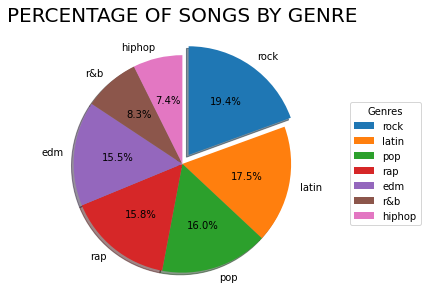

In [665]:
#Se genera un gráfico de torta mostrando el porcentaje de canciones por género
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(5)
fig.patch.set_facecolor('white')
explode_pie1 = (0.1, 0, 0, 0, 0, 0 , 0)
plt.pie(spot_genre_count['Title'], 
        labels=spot_genre_count['Genre'], 
        explode=explode_pie1,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        counterclock=False,
        textprops=dict(color="k"))
plt.title(str.upper('Percentage of songs by genre'), fontsize=20)
plt.legend(spot_genre_count['Genre'], 
           loc='center left', 
           bbox_to_anchor=(1.1, 0.5), 
           title='Genres')
plt.savefig('SpotifyDF - Percentage of songs by genre.png', facecolor=fig.get_facecolor(), transparent=False)
plt.show()

## Popularity by genre:

* On account of the disparity between quantity of songs per genre, we'll be using the mean() function instead of the sum()

In [666]:
#Se crea una variable donde se agrupan los registros por género y se calcula el promedio de los valores de cada género
spot_genre = spot.groupby(['Genre']).mean()
#Se seleccionan algunos de los valores que nos interesa observar
spot_genre_afeat = spot_genre[['popularity', 'danceability', 'speechiness', 'acousticness', 'liveness', 'loudness']]
spot_genre_afeat.sort_values(by='popularity', 
                             ascending=False)
#Se extraen los valores numéricos absolutos (columna "loudness" tiene valores negativos)
spot_genre_afeat = spot_genre_afeat.abs()
#Se convierte el index "Genre" en columna y se ordenan los valores por popularidad
spot_genre_afeat.reset_index(inplace=True)
spot_genre_afeat = spot_genre_afeat.sort_values('popularity')
#Se exporta la tabla generada a un archivo excel
spot_genre_afeat.to_excel("spot_genre_afeat.xlsx", 
                          sheet_name='Spotify Audio Features by Genre') 
spot_genre_afeat

,Genre,popularity,danceability,speechiness,acousticness,liveness,loudness
1,hiphop,48.135831,0.738796,0.226773,0.156156,0.214010,7.969981
4,r&b,51.816116,0.670700,0.093346,0.229050,0.155434,7.652372
0,edm,55.209534,0.627212,0.079568,0.072103,0.199752,4.983537
2,latin,57.845776,0.706846,0.079669,0.272499,0.174417,6.183950
5,rap,62.846238,0.756292,0.195674,0.131449,0.197150,6.882179
6,rock,63.636847,0.513190,0.054074,0.141716,0.189474,7.807462
3,pop,68.308602,0.645746,0.076612,0.267282,0.158901,6.483045


In [667]:
#Para ilustrar el error que se observaría utilizando sum() se genera la siguiente tabla
spot_genre_error = spot.groupby(['Genre']).sum()
#Se seleccionan algunos de los valores que nos interesa observar
spot_genre_afeat_error = spot_genre_error[['popularity', 'danceability', 'speechiness', 'acousticness', 'liveness', 'loudness']]
spot_genre_afeat_error.sort_values(by='popularity', 
                             ascending=False)
#Se extraen los valores numéricos absolutos (columna "loudness" tiene valores negativos)
spot_genre_afeat_error = spot_genre_afeat_error.abs()
#Se convierte el index "Genre" en columna y se ordenan los valores por popularidad
spot_genre_afeat_error.reset_index(inplace=True)
spot_genre_afeat_error = spot_genre_afeat_error.sort_values('popularity')
spot_genre_afeat_error

,Genre,popularity,danceability,speechiness,acousticness,liveness,loudness
1,hiphop,20554,315.466,96.8319,66.678686,91.3822,3403.182
4,r&b,25079,324.619,45.1794,110.860179,75.2299,3703.748
0,edm,49799,565.745,71.7707,65.036649,180.1764,4495.150
5,rap,57630,693.520,179.4326,120.539137,180.7861,6310.958
2,latin,58887,719.569,81.1028,277.403614,177.5561,6295.261
3,pop,63527,600.544,71.2488,248.572381,147.7778,6029.232
6,rock,71846,579.392,61.0500,159.997008,213.9158,8814.625


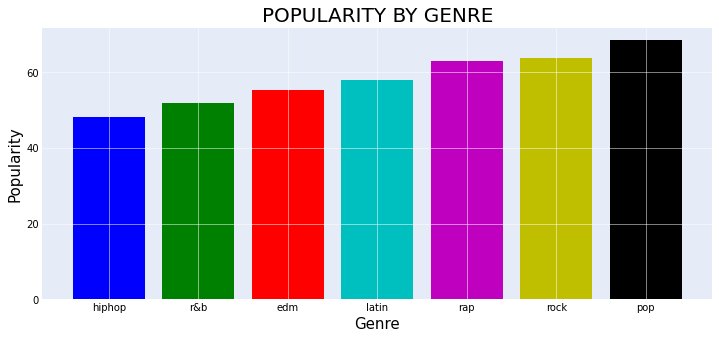

In [668]:
#Se genera un gráfico de barras de los géneros según su popularidad
# Styling of the figure
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(5)
fig.patch.set_facecolor('white')
plt.bar(spot_genre_afeat['Genre'], 
        spot_genre_afeat['popularity'].sort_values(ascending=True), 
        color=['b','g','r','c','m','y','k'])
plt.title(str.upper(f'Popularity by genre'), fontsize=20)
plt.xlabel("Genre", fontsize=15) 
plt.ylabel("Popularity", fontsize=15) 
# Styling of the plot
plt.grid(color = 'white', linewidth = 0.5)
plt.locator_params(axis='y', nbins=6)
# Styling of the axes
ax = plt.gca()
ax.set_facecolor('#e6ecf7')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.savefig('SpotifyDF - Popularity by genre.png', transparent=False)
plt.show()

## Percentage of explicit songs:

In [669]:
#Se crea una función para poder contar la cantidad de canciones con contenido explícito y sin contenido explícito
def explicit(x):
  if x=='explicit content':
    return 'explicit songs'
  else:
    return 'not explicit songs'

spot_explicit = spot['explicit'].apply(explicit)
spot_explicit

0       not explicit songs
1       not explicit songs
2       not explicit songs
3       not explicit songs
4       not explicit songs
               ...        
6908        explicit songs
6909    not explicit songs
6910    not explicit songs
6913    not explicit songs
6916        explicit songs
Name: explicit, Length: 5807, dtype: object

In [670]:
spot_explicit = spot_explicit.to_frame()
spot_explicit

,explicit
0,not explicit songs
1,not explicit songs
2,not explicit songs
3,not explicit songs
4,not explicit songs
...,...
6908,explicit songs
6909,not explicit songs
6910,not explicit songs
6913,not explicit songs


In [671]:
spot_explicit.reset_index(inplace=True)
spot_expl_count = spot_explicit.groupby('explicit').count()
spot_expl_count.reset_index(inplace=True)
spot_expl_count

,explicit,index
0,explicit songs,1591
1,not explicit songs,4216


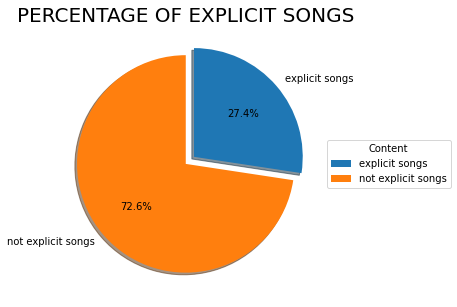

In [672]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(5)
fig.patch.set_facecolor('white')
explode_pie2 = (0.1, 0)
plt.pie(spot_expl_count['index'], 
        labels=spot_expl_count['explicit'], 
        autopct='%1.1f%%',
        explode=explode_pie2,
        shadow=True, 
        startangle=90,
        counterclock=False,
        textprops=dict(color="k"))
plt.title(str.upper('Percentage of explicit songs'), fontsize=20)
plt.legend(spot_expl_count['explicit'], 
           loc='center left',
           bbox_to_anchor=(1, 0.5), 
           title='Content')
plt.savefig('SpotifyDF - Percentage of explicit songs.png', facecolor=fig.get_facecolor(), transparent=False)
plt.show()

# >Choose which audio features to analyze:

In [673]:
AFEAT = 'loudness'
AFEAT2 = 'danceability'

## Audio feature by genre:

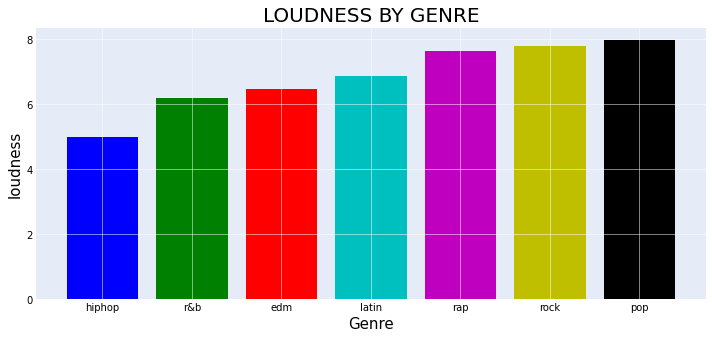

In [674]:
#Se genera un gráfico de barras con los valores de 'loudness' según género
# Styling of the figure
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(5)
fig.patch.set_facecolor('white')
plt.bar(spot_genre_afeat['Genre'], 
        spot_genre_afeat[AFEAT].sort_values(ascending=True), 
        color=['b','g','r','c','m','y','k'])
plt.title(str.upper(f'{AFEAT} by genre'), fontsize=20)
plt.xlabel("Genre", fontsize=15) 
plt.ylabel(AFEAT, fontsize=15) 
# Styling of the plot
plt.grid(color = 'white', linewidth = 0.5)
plt.locator_params(axis='y', nbins=6)
# Styling of the axes
ax = plt.gca()
ax.set_facecolor('#e6ecf7')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.savefig(f'SpotifyDF - Level of {AFEAT} by genre.png', transparent=False)
plt.show()

## Audio features per decade:

In [675]:
# Se crea un dataframe nuevo para analizar por década
spot2 = spot[[AFEAT, AFEAT2,'release_year']]
spot2.dtypes

loudness        float64
danceability    float64
release_year     string
dtype: object

In [676]:
spot2 = spot2.sort_values('release_year', ascending=True)

In [677]:
spot2['release_year'] = spot2['release_year'].astype(int)

In [678]:
spot2.dtypes

loudness        float64
danceability    float64
release_year      int32
dtype: object

In [679]:
spot2

,loudness,danceability,release_year
310,-9.129,0.534,1959
1126,-20.567,0.380,1963
879,-9.519,0.525,1964
110,-6.696,0.295,1964
889,-13.551,0.525,1964
...,...,...,...
2115,-3.184,0.625,2021
5683,-8.440,0.948,2021
4111,-9.971,0.429,2021
4110,-5.947,0.764,2021


In [680]:
spot_afeat_dec = spot2[[AFEAT, AFEAT2]].groupby((spot2['release_year']//10)*10).mean()
spot_afeat_dec 

,loudness,danceability
release_year,,
1950,-9.129000,0.534000
1960,-10.112569,0.495583
1970,-9.912771,0.533221
1980,-9.135247,0.605365
1990,-8.250185,0.673201
2000,-6.084730,0.675313
2010,-5.972376,0.654773
2020,-5.962466,0.669471


In [681]:
spot_afeat_dec.reset_index(inplace=True)
spot_afeat_dec = spot_afeat_dec.abs()
spot_afeat_dec

,release_year,loudness,danceability
0,1950,9.129000,0.534000
1,1960,10.112569,0.495583
2,1970,9.912771,0.533221
3,1980,9.135247,0.605365
4,1990,8.250185,0.673201
5,2000,6.084730,0.675313
6,2010,5.972376,0.654773
7,2020,5.962466,0.669471


In [682]:
spot_afeat_dec.rename(columns={'release_year': 'decade'}, inplace=True)
spot_afeat_dec.to_excel(f"spot_{AFEAT}-{AFEAT2}_decade.xlsx", 
                          sheet_name=f'Audio feat. per decade') 
spot_afeat_dec

,decade,loudness,danceability
0,1950,9.129000,0.534000
1,1960,10.112569,0.495583
2,1970,9.912771,0.533221
3,1980,9.135247,0.605365
4,1990,8.250185,0.673201
5,2000,6.084730,0.675313
6,2010,5.972376,0.654773
7,2020,5.962466,0.669471


In [683]:
#En caso de querer extraer los últimos dos números del año
#spot_loud_dec['release_year'] = spot_loud_dec['release_year'].astype(str)
#spot_loud_dec['decade'] = spot_loud_dec['release_year'].apply(lambda x: x[2:4])
#spot_loud_dec"""

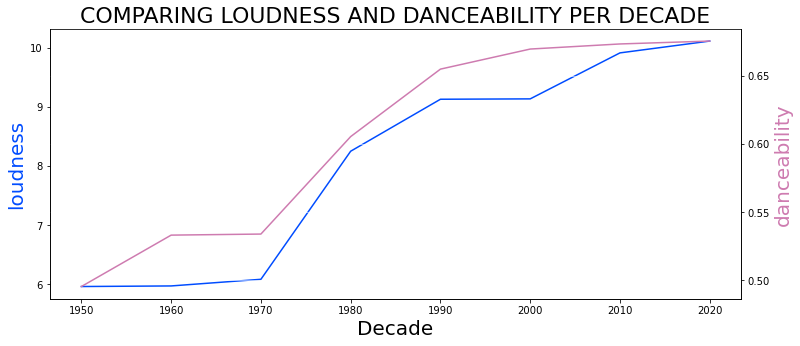

In [684]:
#Se genera un gráfico de línea con los valores de 'loudness' por década
# Styling of the figure
fig = plt.figure(figsize=(12,5))
fig.patch.set_facecolor('white')
axes1 = fig.add_axes([0.1,0.15,0.8,0.75])
axes2 = axes1.twinx()


p1, = axes1.plot(spot_afeat_dec['decade'], spot_afeat_dec[AFEAT].sort_values(ascending=True), color='#004cff')
p2, = axes2.plot(spot_afeat_dec['decade'], spot_afeat_dec[AFEAT2].sort_values(ascending=True), color='#CE7BB0')
axes1.set_title(str.upper(f'Comparing {AFEAT} and {AFEAT2} per decade'), fontsize=22)
axes1.set_xlabel("Decade", fontsize=20) 
axes1.set_ylabel(AFEAT, fontsize=20) 
axes2.set_ylabel(AFEAT2, fontsize=20) 

# Styling of the plot
plt.grid(color = 'white', linewidth = 0.5)
plt.locator_params(axis='y', nbins=6)
# Styling of the axes
ax = plt.gca()
ax.set_facecolor('#e6ecf7')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(axis=u'both', which=u'both', length=3)

axes1.yaxis.get_label().set_color(p1.get_color())
axes1.yaxis.get_label().set_color(p1.get_color())
axes2.yaxis.get_label().set_color(p2.get_color())


plt.savefig(f'SpotifyDF - Comparing {AFEAT} and {AFEAT2} per decade.png', transparent=False)
plt.show()

### Comparing charts side by side:

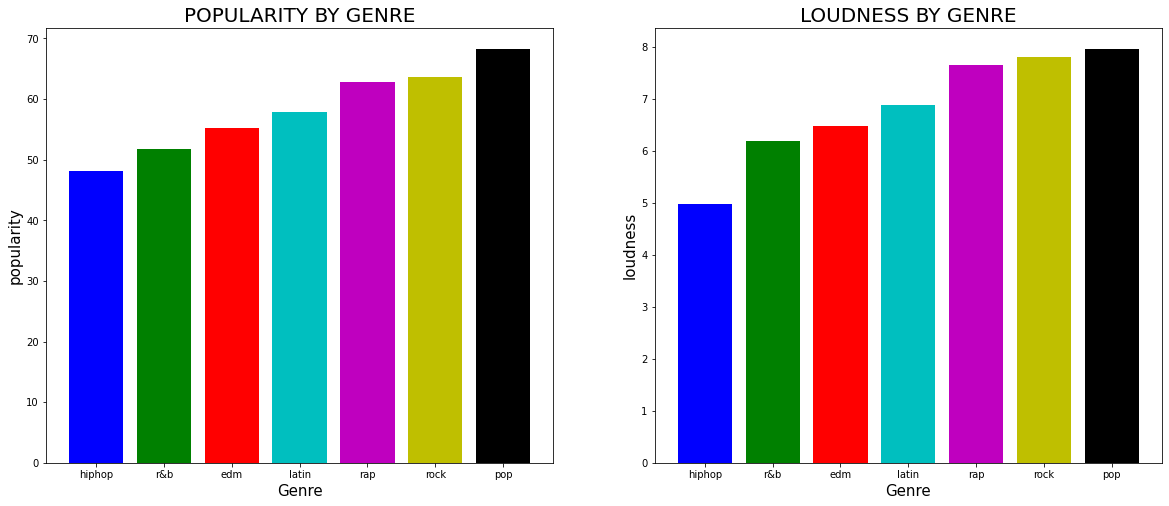

In [685]:
# Se comparan gráficos lado a lado para evaluar correlación

# Creating the figure and axes
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,8))
fig.patch.set_facecolor('white')

# Labels ans titles
ax1.set_title(str.upper('Popularity by genre'), fontsize=20)
ax1.set_xlabel('Genre', fontsize=15)
ax1.set_ylabel('popularity', fontsize=15)

ax2.set_title(str.upper(f'{AFEAT} by genre'), fontsize=20)
ax2.set_xlabel('Genre', fontsize=15)
ax2.set_ylabel(AFEAT, fontsize=15)

# Plot 1
ax1.bar(spot_genre_afeat['Genre'], 
        spot_genre_afeat['popularity'].sort_values(ascending=True), 
        color=['b','g','r','c','m','y','k'])

# Plot 2
ax2.bar(spot_genre_afeat['Genre'], 
        spot_genre_afeat[AFEAT].sort_values(ascending=True), 
        color=['b','g','r','c','m','y','k'])
plt.savefig(f'SpotifyDF - Comparing popularity and {AFEAT} charts by genre.png', transparent=False)
plt.show()

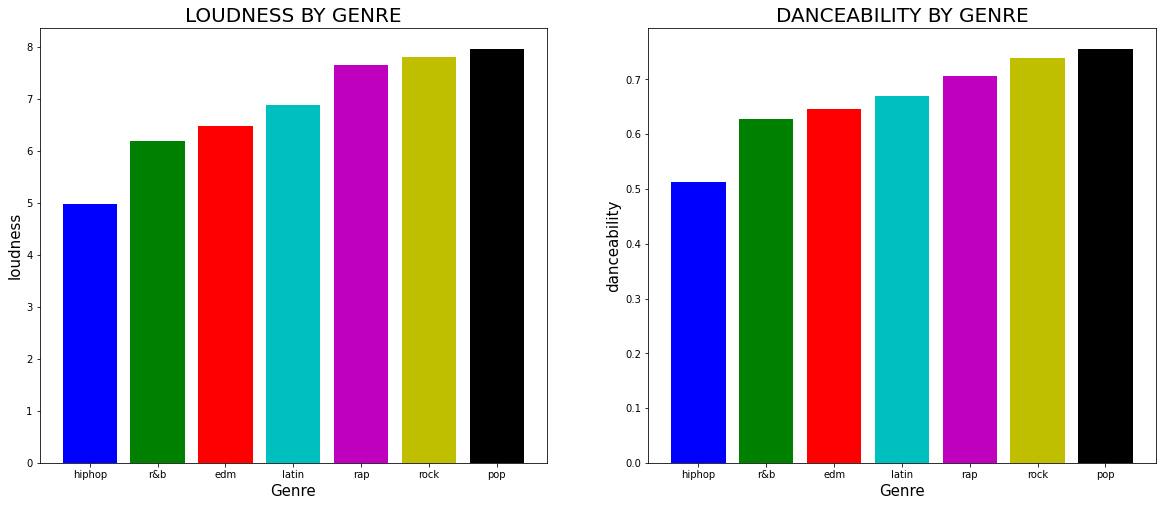

In [686]:
# Se comparan gráficos lado a lado para evaluar correlación

# Creating the figure and axes
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(20,8))
fig.patch.set_facecolor('white')

# Labels ans titles
ax1.set_title(str.upper(f'{AFEAT} by genre'), fontsize=20)
ax1.set_xlabel('Genre', fontsize=15)
ax1.set_ylabel(AFEAT, fontsize=15)

ax2.set_title(str.upper(f'{AFEAT2} by genre'), fontsize=20)
ax2.set_xlabel('Genre', fontsize=15)
ax2.set_ylabel(AFEAT2, fontsize=15)

# Plot 1
ax1.bar(spot_genre_afeat['Genre'], 
        spot_genre_afeat[AFEAT].sort_values(ascending=True), 
        color=['b','g','r','c','m','y','k'])

# Plot 2
ax2.bar(spot_genre_afeat['Genre'], 
        spot_genre_afeat[AFEAT2].sort_values(ascending=True), 
        color=['b','g','r','c','m','y','k'])
plt.savefig(f'SpotifyDF - Comparing {AFEAT} and {AFEAT2} by genre.png', transparent=False)
plt.show()